# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [13]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 639


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [29]:
# Set the API base URL
url = f'https://api.openweathermap.org/data/2.5/weather?units=metric&appid={weather_api_key}'
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'{url}&q={city}'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']


        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | comodoro rivadavia
Processing Record 2 of Set 1 | avarua
Processing Record 3 of Set 1 | noumea
Processing Record 4 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 5 of Set 1 | san cristobal
Processing Record 6 of Set 1 | georgetown
Processing Record 7 of Set 1 | hamilton
Processing Record 8 of Set 1 | new norfolk
Processing Record 9 of Set 1 | ustupo
Processing Record 10 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 11 of Set 1 | mataura
Processing Record 12 of Set 1 | sibolga
Processing Record 13 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 14 of Set 1 | rikitea
Processing Record 15 of Set 1 | opotiki
Processing Record 16 of Set 1 | bosaso
Processing Record 17 of Set 1 | atuona
Processing Record 18 of Set 1 | saint george
Processing Record 19 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 20 of Set 1 |

Processing Record 36 of Set 4 | henderson
Processing Record 37 of Set 4 | padang
Processing Record 38 of Set 4 | bonavista
Processing Record 39 of Set 4 | jinka
Processing Record 40 of Set 4 | tasiilaq
Processing Record 41 of Set 4 | pedernales
Processing Record 42 of Set 4 | ancud
Processing Record 43 of Set 4 | evensk
Processing Record 44 of Set 4 | kyzyl-suu
Processing Record 45 of Set 4 | najran
Processing Record 46 of Set 4 | inhambane
Processing Record 47 of Set 4 | bardiyah
Processing Record 48 of Set 4 | cockburn town
Processing Record 49 of Set 4 | vila velha
Processing Record 0 of Set 5 | samaro
Processing Record 1 of Set 5 | ilo
Processing Record 2 of Set 5 | barentsburg
City not found. Skipping...
Processing Record 3 of Set 5 | bacalar
Processing Record 4 of Set 5 | gazojak
Processing Record 5 of Set 5 | marcona
City not found. Skipping...
Processing Record 6 of Set 5 | tongliao
Processing Record 7 of Set 5 | pacific grove
Processing Record 8 of Set 5 | dandong
Processing R

Processing Record 28 of Set 8 | chara
Processing Record 29 of Set 8 | doha
Processing Record 30 of Set 8 | sorland
Processing Record 31 of Set 8 | kopervik
Processing Record 32 of Set 8 | oranjemund
Processing Record 33 of Set 8 | korla
Processing Record 34 of Set 8 | huittinen
Processing Record 35 of Set 8 | thano bula khan
City not found. Skipping...
Processing Record 36 of Set 8 | manakara
Processing Record 37 of Set 8 | shingu
Processing Record 38 of Set 8 | tarauaca
Processing Record 39 of Set 8 | montauban
Processing Record 40 of Set 8 | san quintin
Processing Record 41 of Set 8 | mastic beach
Processing Record 42 of Set 8 | airai
Processing Record 43 of Set 8 | hovd
Processing Record 44 of Set 8 | kuusamo
Processing Record 45 of Set 8 | novobirilyussy
Processing Record 46 of Set 8 | lagoa
Processing Record 47 of Set 8 | bordighera
Processing Record 48 of Set 8 | buy
Processing Record 49 of Set 8 | royan
Processing Record 0 of Set 9 | saint-pierre
Processing Record 1 of Set 9 | m

Processing Record 20 of Set 12 | urubicha
Processing Record 21 of Set 12 | tursunzoda
Processing Record 22 of Set 12 | maxixe
Processing Record 23 of Set 12 | sahuaripa
Processing Record 24 of Set 12 | yar-sale
Processing Record 25 of Set 12 | tortoli
Processing Record 26 of Set 12 | pimentel
Processing Record 27 of Set 12 | deqing
Processing Record 28 of Set 12 | kurilsk
Processing Record 29 of Set 12 | diamantino
Processing Record 30 of Set 12 | majene
Processing Record 31 of Set 12 | lasem
Processing Record 32 of Set 12 | rota
Processing Record 33 of Set 12 | dingle
Processing Record 34 of Set 12 | sarh
Processing Record 35 of Set 12 | gaffney
Processing Record 36 of Set 12 | ingraj bazar
Processing Record 37 of Set 12 | ondorhaan
City not found. Skipping...
Processing Record 38 of Set 12 | booue
Processing Record 39 of Set 12 | fos-sur-mer
Processing Record 40 of Set 12 | morant bay
Processing Record 41 of Set 12 | batouri
Processing Record 42 of Set 12 | eyl
Processing Record 43 o

In [30]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          596
Lat           596
Lng           596
Max Temp      596
Humidity      596
Cloudiness    596
Wind Speed    596
Country       596
Date          596
dtype: int64

In [31]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,comodoro rivadavia,-45.8667,-67.5000,10.92,43,20,2.06,AR,1680212271
1,avarua,-21.2078,-159.7750,28.03,89,75,5.66,CK,1680212176
2,noumea,-22.2763,166.4572,26.67,99,25,0.85,NC,1680211821
3,san cristobal,7.7669,-72.2250,25.10,59,51,1.66,VE,1680212272
4,georgetown,5.4112,100.3354,26.96,92,20,1.03,MY,1680212183


In [33]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [34]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,comodoro rivadavia,-45.8667,-67.5000,10.92,43,20,2.06,AR,1680212271
1,avarua,-21.2078,-159.7750,28.03,89,75,5.66,CK,1680212176
2,noumea,-22.2763,166.4572,26.67,99,25,0.85,NC,1680211821
3,san cristobal,7.7669,-72.2250,25.10,59,51,1.66,VE,1680212272
4,georgetown,5.4112,100.3354,26.96,92,20,1.03,MY,1680212183


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

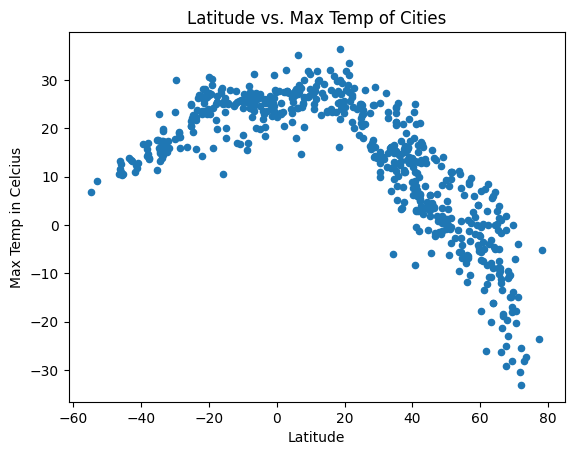

In [37]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot(kind="scatter", x="Lat",y="Max Temp")
# Incorporate the other graph properties
plt.title('Latitude vs. Max Temp of Cities')
plt.ylabel('Max Temp in Celcius')
plt.xlabel('Latitude')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

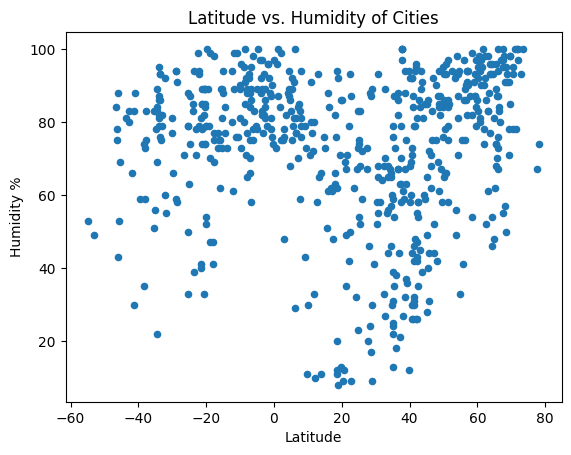

In [43]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot(kind="scatter", x="Lat",y="Humidity")
# Incorporate the other graph properties
plt.title('Latitude vs. Humidity of Cities')
plt.ylabel('Humidity %')
plt.xlabel('Latitude')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

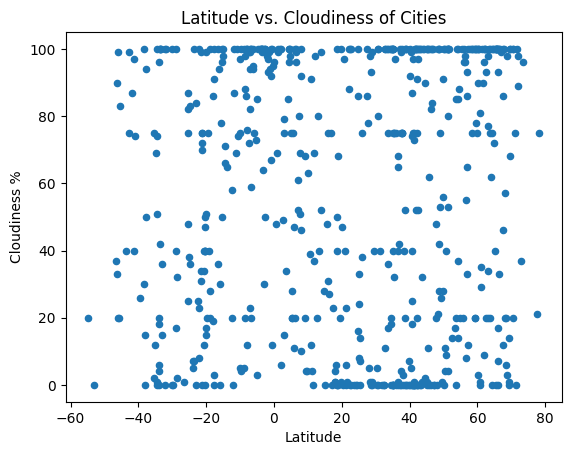

In [44]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot(kind="scatter", x="Lat",y="Cloudiness")

# Incorporate the other graph properties
plt.title('Latitude vs. Cloudiness of Cities')
plt.ylabel('Cloudiness %')
plt.xlabel('Latitude')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

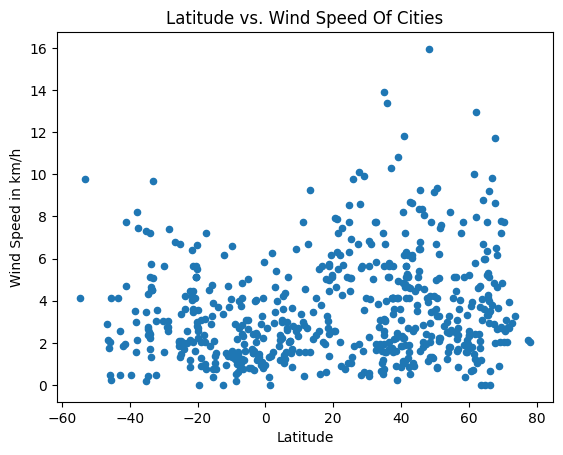

In [48]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot(kind="scatter",x='Lat',y='Wind Speed')

# Incorporate the other graph properties
plt.title("Latitude vs. Wind Speed Of Cities")
plt.ylabel('Wind Speed in km/h')
plt.xlabel('Latitude')
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [117]:
# Define a function to create Linear Regression plots
def linearRegression (x,y,z):
    (slope,intercept, rvalue, pvalue, stderr)=linregress(z[x],z[y])
    slope,intercept, rvalue, pvalue, stderr
    

    regress_values = z[x] * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(z[x],z[y])
    plt.plot(z[x],regress_values,"r-")
    plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()


In [91]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0) use.loc[latitude]
northern_hemi_df=city_data_df.loc[city_data_df['Lat']>=0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,san cristobal,7.7669,-72.2250,25.10,59,51,1.66,VE,1680212272
4,georgetown,5.4112,100.3354,26.96,92,20,1.03,MY,1680212183
5,hamilton,39.1834,-84.5333,17.35,36,0,4.12,US,1680212057
7,ustupo,9.1333,-77.9333,26.50,79,68,6.44,PA,1680212273
9,sibolga,1.7427,98.7792,23.43,84,100,1.36,ID,1680212274


In [100]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=city_data_df.loc[city_data_df['Lat']<0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,comodoro rivadavia,-45.8667,-67.5000,10.92,43,20,2.06,AR,1680212271
1,avarua,-21.2078,-159.7750,28.03,89,75,5.66,CK,1680212176
2,noumea,-22.2763,166.4572,26.67,99,25,0.85,NC,1680211821
6,new norfolk,-42.7826,147.0587,13.29,80,99,0.45,AU,1680212273
8,mataura,-46.1927,168.8643,11.63,75,33,1.75,NZ,1680212143


###  Temperature vs. Latitude Linear Regression Plot

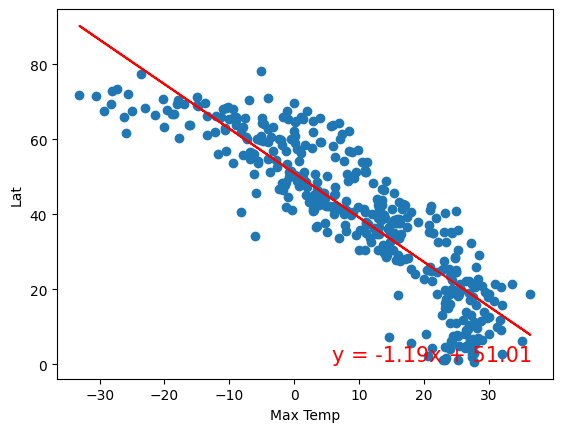

In [118]:
# Linear regression on Northern Hemisphere
x='Max Temp'
y='Lat'
z=northern_hemi_df

linearRegression(x,y,z)

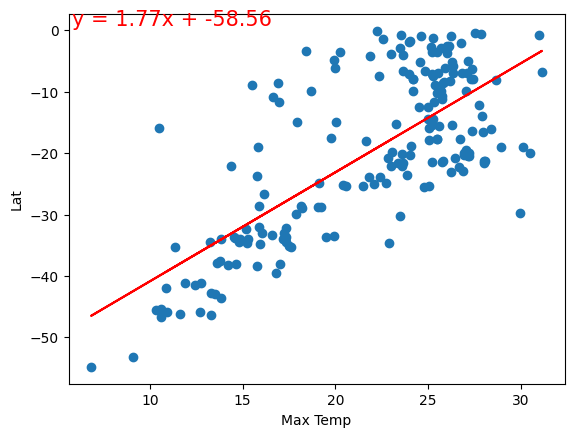

In [105]:
# Linear regression on Southern Hemisphere
x='Max Temp'
y='Lat'
z=southern_hemi_df

linearRegression(x,y,z)

**Discussion about the linear relationship:** In the northern hemisphere, as the latitude decreases and gets closer to 0, or the equator, the temp increases. In the southern hemisphere, as the latitude increases from negative values to 0, the temperature gets warmer. 

### Humidity vs. Latitude Linear Regression Plot

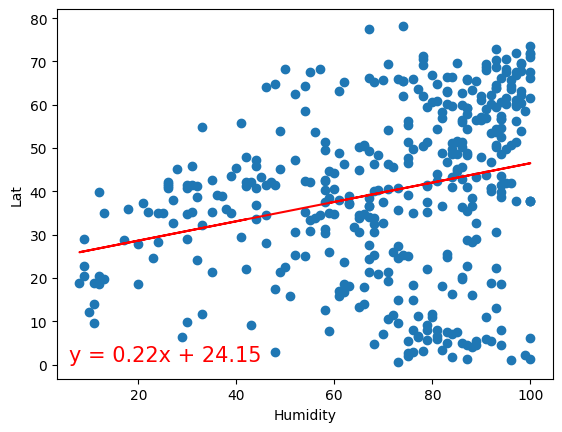

In [110]:
# Northern Hemisphere
x='Humidity'
y='Lat'
z=northern_hemi_df

linearRegression(x,y,z)

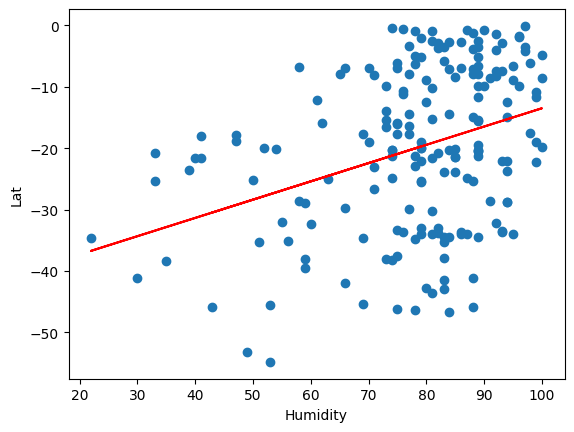

In [112]:
# Southern Hemisphere
x='Humidity'
y='Lat'
z=southern_hemi_df

linearRegression(x,y,z)

**Discussion about the linear relationship:** Generally speaking, the environment is more humid, ths closer to the equator that you get. 

### Cloudiness vs. Latitude Linear Regression Plot

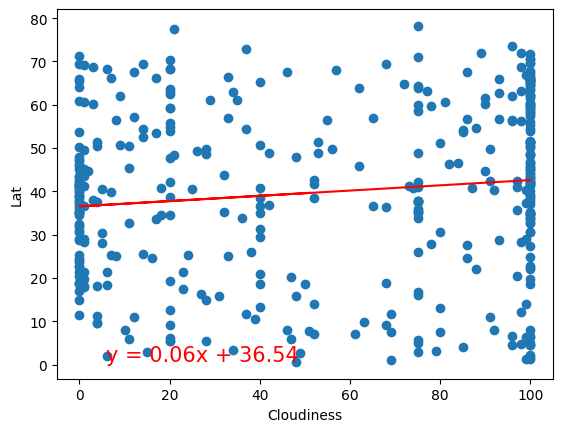

In [113]:
# Northern Hemisphere
x='Cloudiness'
y='Lat'
z=northern_hemi_df

linearRegression(x,y,z)

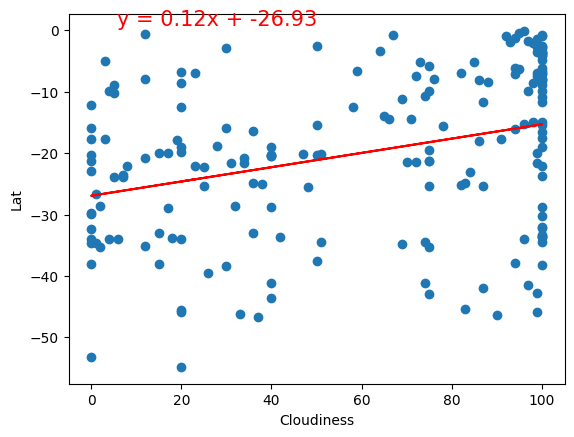

In [114]:
# Southern Hemisphere
x='Cloudiness'
y='Lat'
z=southern_hemi_df

linearRegression(x,y,z)

**Discussion about the linear relationship:** There are clouds everywhere, and a weak correlation on where they concentrate. 

### Wind Speed vs. Latitude Linear Regression Plot

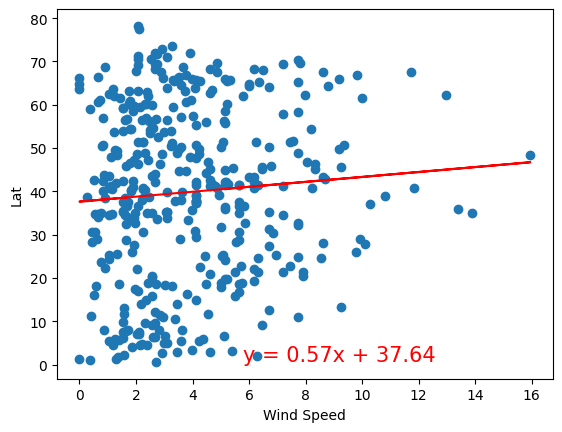

In [115]:
# Northern Hemisphere
x='Wind Speed'
y='Lat'
z=northern_hemi_df

linearRegression(x,y,z)

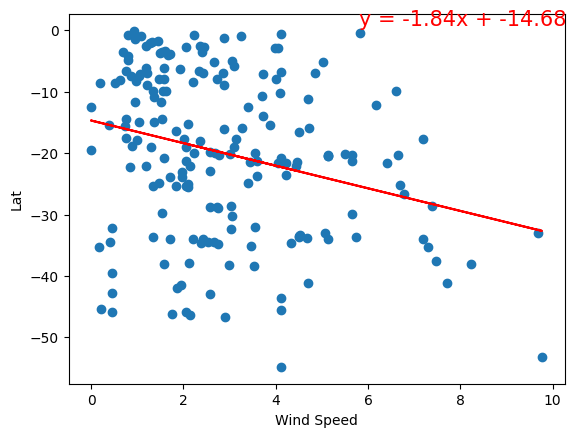

In [116]:
# Southern Hemisphere
x='Wind Speed'
y='Lat'
z=southern_hemi_df

linearRegression(x,y,z)

**Discussion about the linear relationship:** Wind speeds get faster as you move further away from the equator. 